# Credit Card Usage Segmentation

## Problem Statement 

Develop comprehensive unsupervised learning models to accurately segment credit card customers based on their spending and payment behaviors. By utilizing these models, the institution aims to improve targeted marketing, risk assessment, and overall customer relationship management.


## Project Overview:

This project focuses on developing unsupervised learning models for customer segmentation based on credit card usage data. The models aim to provide insights into distinct customer segments, improve credit risk assessment, and optimize marketing strategies. Deliverables include segmentation models, comprehensive data visualizations, and a comparative analysis of various algorithms.

## Project Benefits: 

**Customer Insights:** The models will help identify distinct customer segments, allowing for more personalized product offerings and services.<br> 
**Risk Management:** Understanding spending patterns can assist in better credit risk assessment and fraud detection.<br>
**Marketing Optimization:** Segmentation can guide more effective and targeted marketing campaigns.<br>

## About the Data: 


| Column Name                          | Description |
|--------------------------------------|-----------------------------------------------------------|
| **CUST_ID**                          | A unique identifier for each customer.                     |
| **BALANCE**                          | The current balance on the credit card account.           |
| **BALANCE_FREQUENCY**                | Indicates how often the balance changes.                  |
| **PURCHASES**                        | Total amount of purchases made.                           |
| **ONEOFF_PURCHASES**                 | Amount spent on one-time purchases.                       |
| **INSTALLMENTS_PURCHASES**           | Amount spent on purchases paid in installments.           |
| **CASH_ADVANCE**                     | Total amount of cash advances taken.                      |
| **PURCHASES_FREQUENCY**              | How often purchases are made.                             |
| **ONEOFF_PURCHASES_FREQUENCY**       | Frequency of one-time purchases.                         |
| **PURCHASES_INSTALLMENTS_FREQUENCY** | How often installment purchases are made.                 |
| **CASH_ADVANCE_FREQUENCY**           | Frequency of cash advances.                              |
| **CASH_ADVANCE_TRX**                 | Number of cash advance transactions.                      |
| **PURCHASES_TRX**                    | Total number of purchase transactions.                    |
| **CREDIT_LIMIT**                     | The credit limit on the account.                         |
| **PAYMENTS**                          | Total amount of payments made.                           |
| **MINIMUM_PAYMENTS**                 | Total amount of minimum payments made.                    |
| **PRC_FULL_PAYMENT**                 | Percentage of times the full payment was made.           |
| **TENURE**                            | Length of time the customer has had the credit card account. |



## Importing Libraries: 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D
#from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import cdist
from itertools import product
import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [3]:
data = pd.read_csv('Customer Data.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Exploratory Data Analysis (EDA)

In [5]:
rows = data.shape[0]
column = data.shape[1]
print(f"Dataset has {rows} Rows and {column} Columns")
data.shape

Dataset has 8950 Rows and 18 Columns


(8950, 18)

In [6]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Summary statistics
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Count unique values in each column
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


In [10]:
# Impute missing values with the mean
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# Verify that there are no missing values left
print(data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## Feature Selection

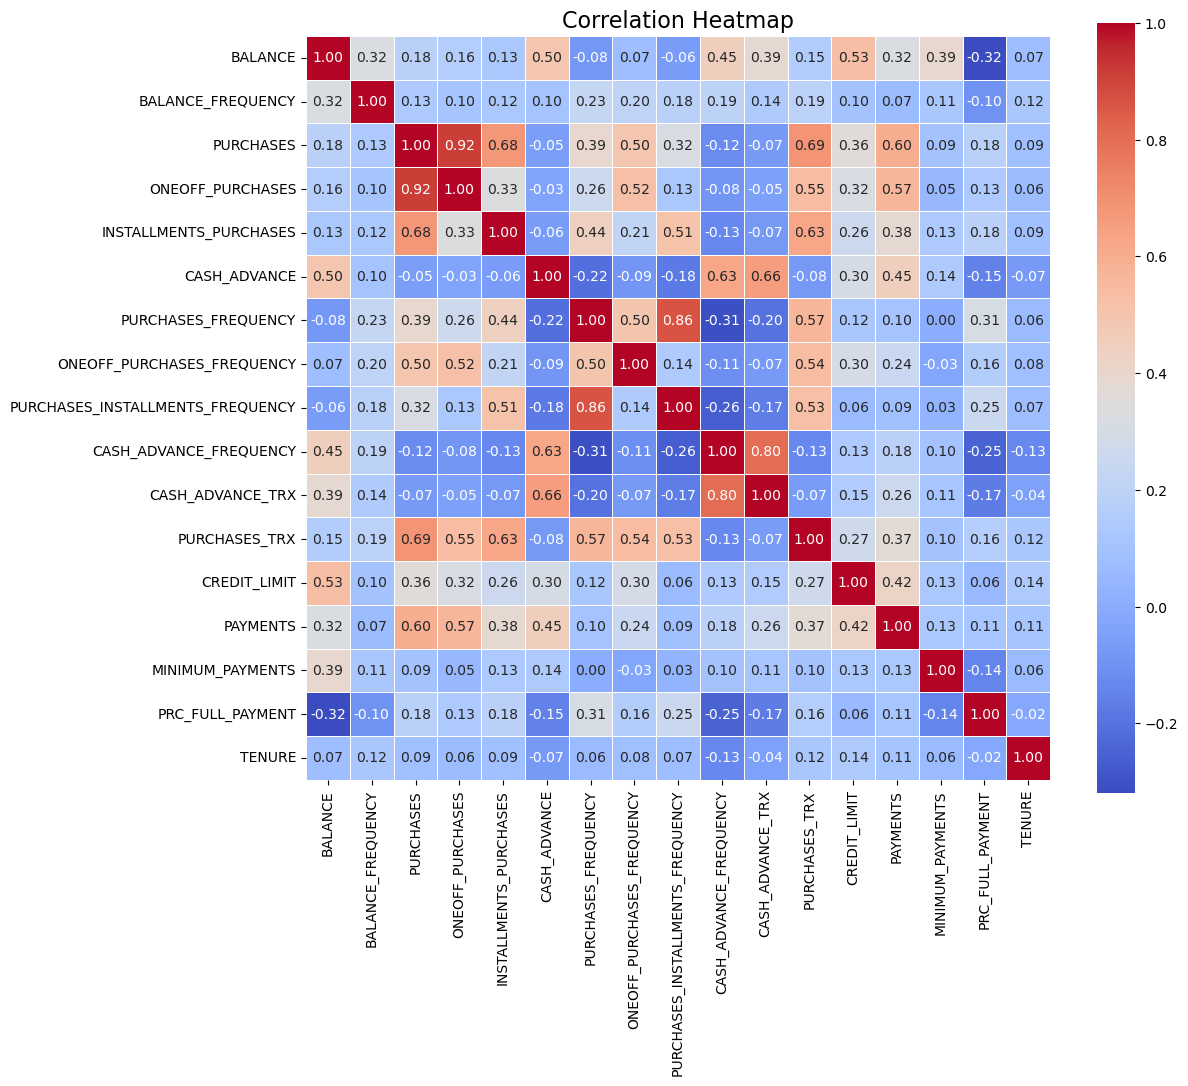

Dropped features: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']
Reduced dataset shape: (8950, 16)


In [12]:
# First, ensure that you drop non-numeric columns before calculating the correlation matrix
# Drop non-numeric columns (e.g., CUST_ID)
data_numeric = data.select_dtypes(include=[np.number])  # Select only numeric columns

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data_numeric.corr()  # Calculate correlation on numeric data
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Set a threshold for correlation
threshold = 0.8

# Identify features to drop
to_drop = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # if correlation is greater than threshold
            colname = correlation_matrix.columns[i]  # getting the name of the column
            if colname not in to_drop:
                to_drop.append(colname)

# Drop the features
data_reduced = data.drop(columns=to_drop)
print(f'Dropped features: {to_drop}')
print(f'Reduced dataset shape: {data_reduced.shape}')

**Insights**

* One-Off Purchases & Total Purchases (0.92): Customers making large one-time purchases contribute significantly to total spending → Target for premium offers.

* Installment Purchases & Total Purchases (0.68): High installment spending correlates with total purchases → Promote EMI options & flexible payment plans.

* Credit Limit & Balance (0.53): Higher credit limits are linked to higher balances → Monitor for credit risk assessment.

* Cash Advance Transactions & Frequency (0.80): Frequent cash advances indicate possible liquidity issues → Potential risk for loan defaults.

* PRC_Full_Payment & Balance (-0.32): Customers paying in full maintain lower balances → Low-risk segment, ideal for loyalty rewards.

* Cash Advance Frequency & PRC_Full_Payment (-0.25): Frequent cash advance users rarely pay in full → Possible financial distress, needs monitoring.

* Payments & Purchases (0.37): Higher purchases lead to higher payments → Opportunity for credit card rewards & cashback offers.

* Minimum Payments & Balance (0.39): Higher balances result in higher minimum payments → Identifies revolving credit users, ideal for EMI products.

* Segmentation Potential: Insights help categorize high spenders, installment users, and cash advance-dependent customers → Personalized marketing.

* Business Impact: Helps optimize marketing campaigns, credit risk management, and customer retention strategies.

## Data Visualization

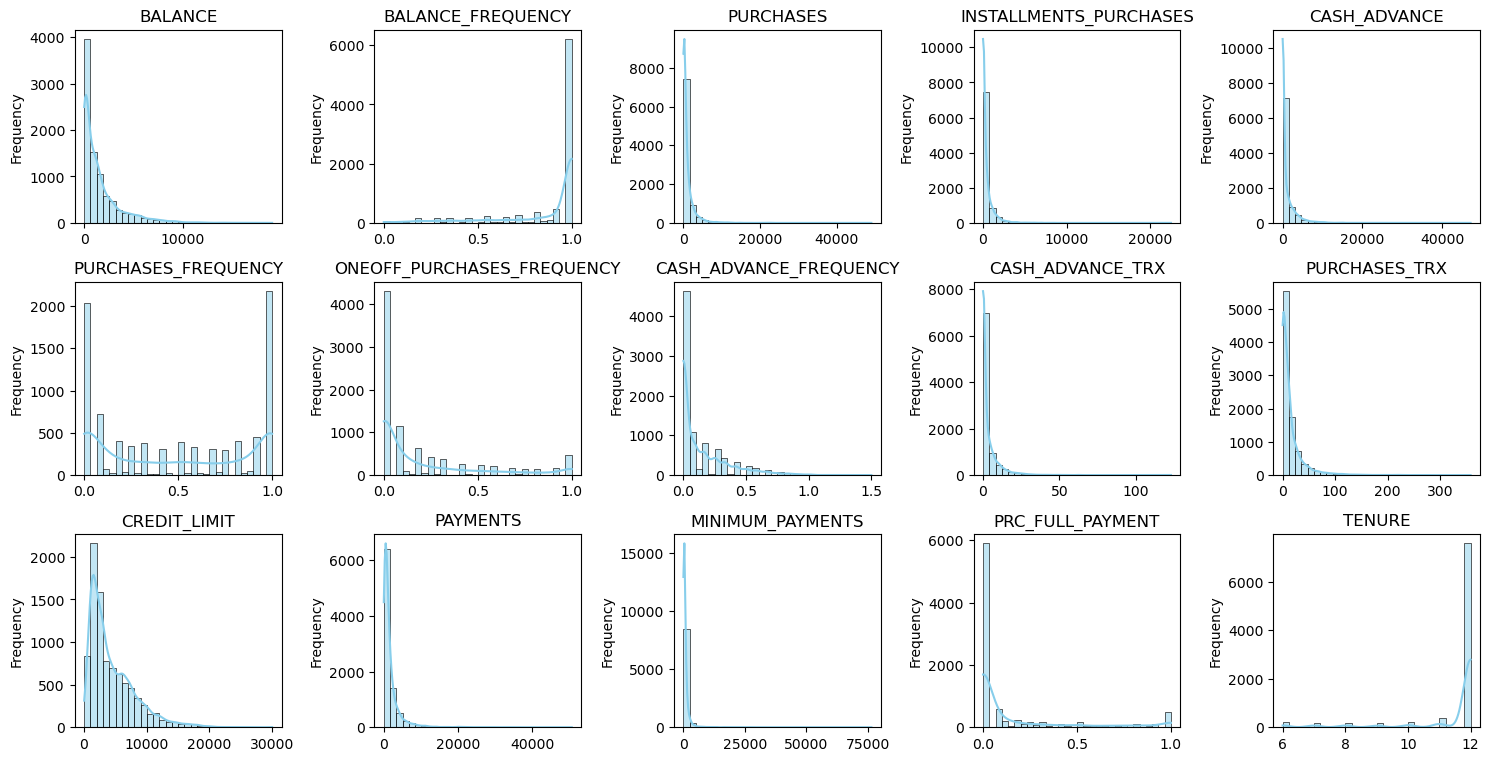

In [15]:
# Visualize distributions of numerical features
numerical_features = data_reduced.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i + 1)
    sns.histplot(data_reduced[feature], kde=True, color='skyblue', bins=30)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Key Points:**
* 95% of user have credit limit below 13.000 with balance keep below 8.000. We assume this is the general population of the data reside. 
* Some feature like `purchases`, `oneoff_purchases`, `INSTALLMENT_purchases`, and `cash_advance` show the same trends as balance and credit limit. 
* balance frequency for 86% of users are updated frequently. We assume this occured due to the balance updated when the purchase made, installment paid, withdrawal, deposit, and cash advance used. 
* There are 2 majority group of customer that made purchase, which is the never or rarely made any purchase and the often one. This could be explained more in after clustering.
* There are more user that paid using installment rather than oneoff payment. We assume the data was obtained from the bank that have high selling points on its credit card facilities.
* By its frequency, there are more user that purchase by installment rather than one off payment. 
* 98% of users pays the installment below 12.000 with the minimum amount are below 5.000. 
* Only around 5% user that had completely paid off the installment. We assume this happens due to data was updated periodically.
* 84% of users still use credit card in the 12th month. We assume the data obtained does not include customer that doesn't had credit card.
it card.

## Data preprocessing 

In [18]:
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_reduced[numerical_features])

### Finding Optimal Number of PCs

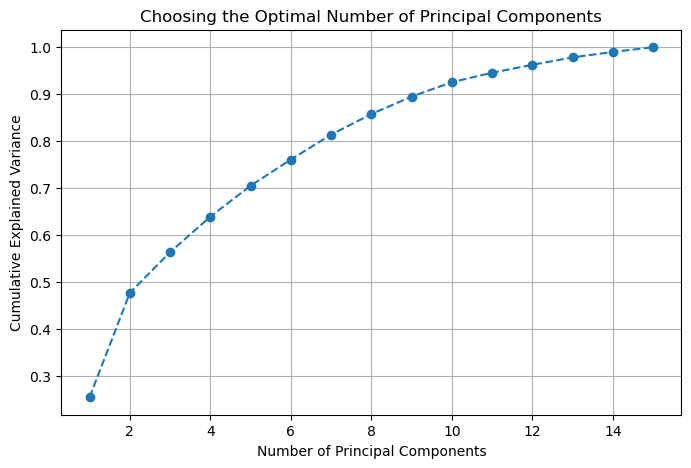

In [22]:
pca = PCA(n_components=len(numerical_features))  # Keep all components initially
pca.fit(scaled_data)

# 3️⃣ Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)  # Cumulative variance sum

# 4️⃣ Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(numerical_features) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Optimal Number of Principal Components')
plt.grid()
plt.show()

### PCA with 2 Components 

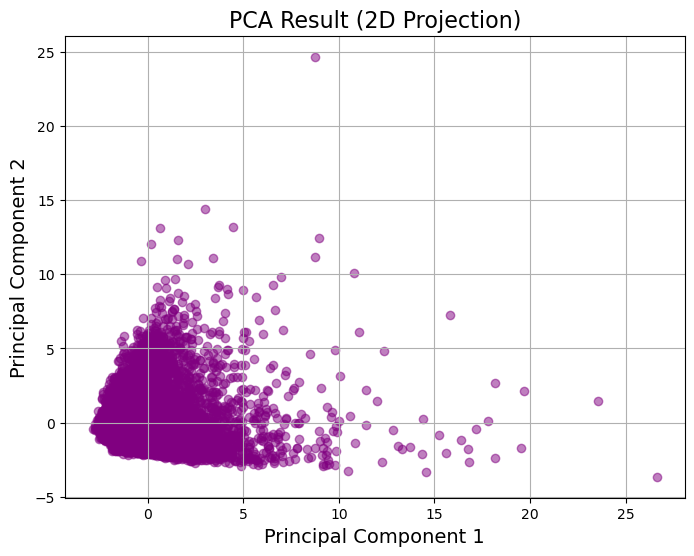

In [24]:
# Apply PCA with 2 components
pca = PCA(n_components=2, random_state=2022)
X_principal = pca.fit_transform(scaled_data)

# Convert to DataFrame
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], alpha=0.5, color='purple')
plt.title('PCA Result (2D Projection)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid()
plt.show()

### PCA with 3 Components 

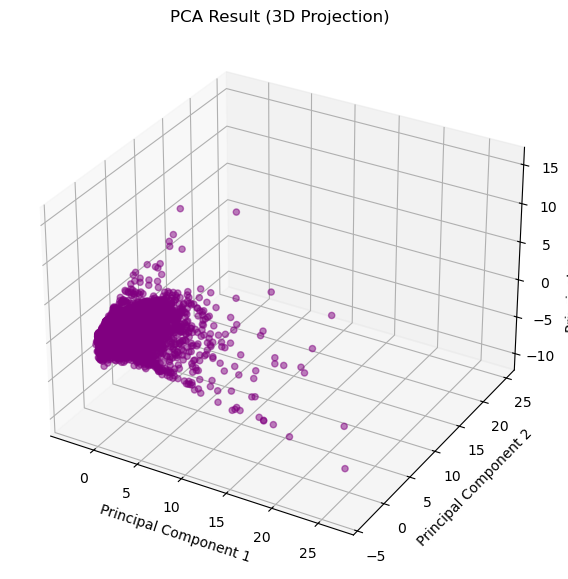

In [28]:
# Apply PCA with 3 components
pca_3d = PCA(n_components=3, random_state=2022)
X_principal_3d = pca_3d.fit_transform(scaled_data)

# Convert to DataFrame
X_principal_3d = pd.DataFrame(X_principal_3d, columns=['P1', 'P2', 'P3'])

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_principal_3d['P1'], X_principal_3d['P2'], X_principal_3d['P3'], alpha=0.5, color='purple')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Result (3D Projection)')

plt.show()

### t- SNE

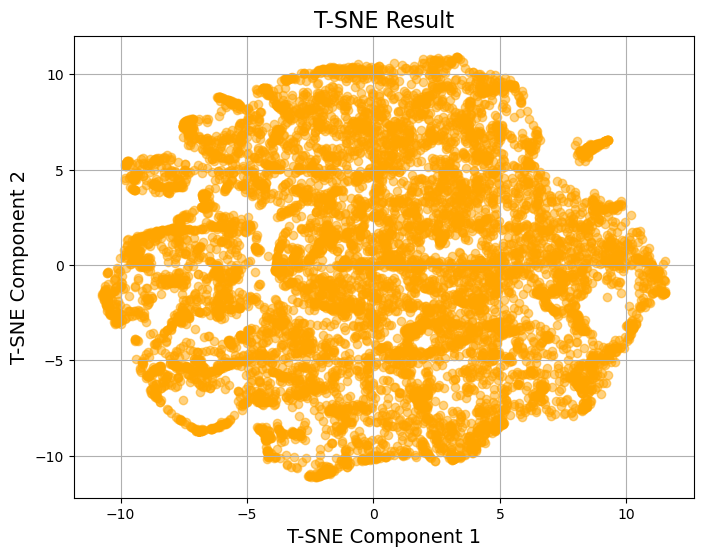

In [35]:
# T-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=2022)
X_tsne = tsne.fit_transform(scaled_data)
X_tsne = pd.DataFrame(X_tsne, columns=['T-SNE 1', 'T-SNE 2'])

# Plot T-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne['T-SNE 1'], X_tsne['T-SNE 2'], alpha=0.5, color='orange')
plt.title('T-SNE Result', fontsize=16)
plt.xlabel('T-SNE Component 1', fontsize=14)
plt.ylabel('T-SNE Component 2', fontsize=14)
plt.grid()
plt.show()

## Clustering

### Agglomerative Clustering

In [51]:
# Create Accumulator for metrics
agglo_s_scores = []
agglo_inertia = []

number_of_cluster = np.arange(2, 11)  # Number of Clusters

### Run agglomerative clustering 

In [72]:
# Initialize empty list
agglo_s_scores = []

# Define the range of clusters (ensuring at least 2 clusters)
for n_clusters in range(2, 11):  # If you want 9 values, start from 2 to 10
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(scaled_data)  # Fit model and get cluster labels
    
    # Compute silhouette score only if clusters > 1
    score = silhouette_score(scaled_data, labels)
    
    agglo_s_scores.append(score)  # Store score in list

# Print the length to confirm it's now 9
print("Agglomerative Silhouette Scores:", agglo_s_scores)
print("Length of agglo_s_scores:", len(agglo_s_scores))

Agglomerative Silhouette Scores: [0.2622153758505102, 0.27192065316057296, 0.10904547903418384, 0.11530188093722156, 0.13317211996224415, 0.12853955321007166, 0.1309021389930943, 0.13473171026507133, 0.1281775660675945]
Length of agglo_s_scores: 9


### Plot Agglomerative Clustering Metrics

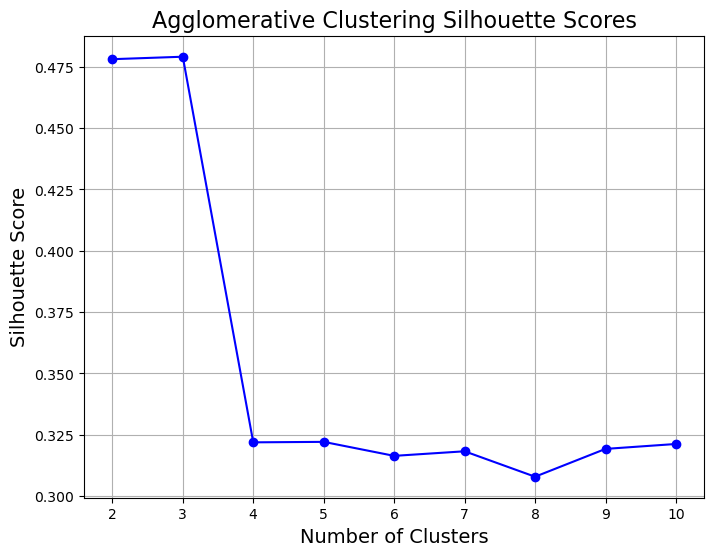

In [44]:
# Plot Silhouette Scores for Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.plot(number_of_cluster, agglo_s_scores, marker='o', color='blue')
plt.title('Agglomerative Clustering Silhouette Scores', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid()
plt.show()

**Insights**
* **Best Number of Clusters**: The plot suggests that the optimal number of clusters for this dataset using agglomerative clustering is likely around 4 or 5 clusters. This is because the silhouette score is highest around these values.

* **Decreasing Silhouette Scores**: As the number of clusters increases beyond 4 or 5, the silhouette score generally decreases. This indicates that the clusters are becoming less distinct and more mixed.

* **Silhouette Score**: The silhouette score measures how similar an object is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined and well-separated clusters.

* **Interpretation**: The results of this analysis suggest that dividing the dataset into 4 or 5 clusters would lead to a more meaningful and interpretable partitioning.

### K means Clustering

### Initialize Metrics

In [57]:
# Create Accumulator for metrics
kmeans_s_scores = []
kmeans_inertia = []

### Run K-Means Clustering

In [61]:
for n_clusters in number_of_cluster:
    kmeans = KMeans(n_clusters=n_clusters, random_state=2022)
    kmeans.fit(X_principal)
    kmeans_labels = kmeans.predict(X_principal)
    kmeans_s_scores.append(silhouette_score(X_principal, kmeans_labels))
    kmeans_inertia.append(kmeans.inertia_)

### Plot K-Means Metrics

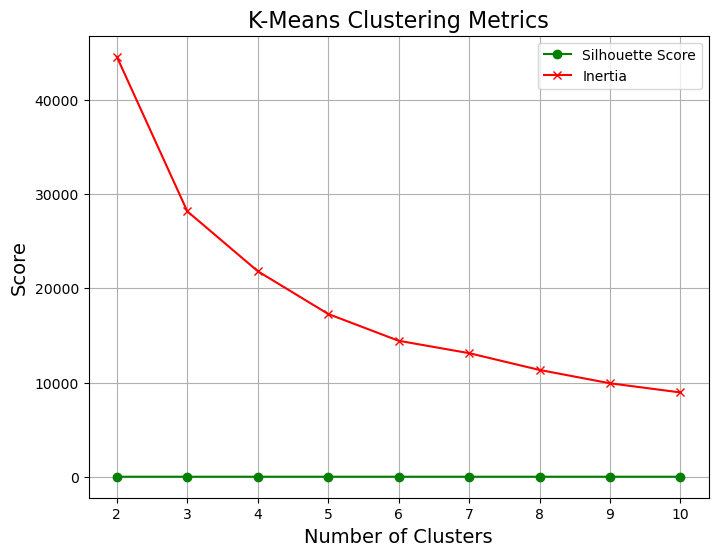

In [62]:
# Plot Silhouette Scores for K-Means Clustering
plt.figure(figsize=(8, 6))
plt.plot(number_of_cluster, kmeans_s_scores, marker='o', color='green', label='Silhouette Score')
plt.plot(number_of_cluster, kmeans_inertia, marker='x', color='red', label='Inertia')
plt.title('K-Means Clustering Metrics', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()
plt.grid()
plt.show()

**Insights**<br>
**Inertia**:
Decreases with the increase in clusters.
This suggests that the model is fitting better to the data as the number of clusters increases.
However, this doesn't necessarily imply a better model.

**Silhouette Score**:
Stays flat at near zero for all clusters.
This indicates that the clusters formed are not very well defined, and the data points might be poorly grouped.

**Overall**:
The plot suggests that increasing the number of clusters doesn't significantly improve the model's ability to find well-separated clusters.
Finding the ideal number of clusters needs further investigation. Consider using methods like the Elbow method or exploring other clustering algorithms.

## Compare Models

In [74]:
# Create a DataFrame to compare the best clusters from Agglomerative Clustering and K-Means
df_compare = pd.DataFrame({
    'Model': ['Agglomerative', 'K-Means'],
    'N Cluster': [4, 4],
    'Silhouette Score': [agglo_s_scores[2], kmeans_s_scores[2]],
    'Inertia': [None, kmeans_inertia[2]]  # Inertia is only applicable for K-Means
})

print(df_compare)

           Model  N Cluster  Silhouette Score       Inertia
0  Agglomerative          4          0.109045           NaN
1        K-Means          4          0.413276  21814.987864


In [76]:
print(len(agglo_s_scores))  # Check how many elements are in the list
print(len(kmeans_s_scores))


9
9


**Overall Interpretation**:

Based on these metrics, the K-Means model with 4 clusters appears to be a better choice for this dataset, as it achieves a higher silhouette score and lower inertia. However, it is important to consider the specific context and objectives of your analysis when making a final decision.

## Best Model

In [80]:
# Fit K-Means model with the best number of clusters
best_n_clusters = 4
kmeans_best_model = KMeans(n_clusters=best_n_clusters, random_state=2022)
kmeans_best_model.fit(X_principal)
kmeans_labels = kmeans_best_model.predict(X_principal)

# Add the cluster labels to the original dataframe
df_cluster = pd.concat([data, pd.DataFrame({'cluster': kmeans_labels})], axis=1)
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


## Cluster Analysis 

In [83]:
# Check the data types of all columns
print("Data Types:")
print(df_cluster.dtypes)

# Inspect unique values in the 'BALANCE' column
print("Unique values in 'BALANCE':")
print(df_cluster['BALANCE'].unique())

# Convert 'BALANCE' to numeric, forcing errors to NaN
df_cluster['BALANCE'] = pd.to_numeric(df_cluster['BALANCE'], errors='coerce')

# Ensure 'cluster' is treated as a categorical variable
df_cluster['cluster'] = df_cluster['cluster'].astype('category')

# Check for any NaN values in 'BALANCE' after conversion
nan_count = df_cluster['BALANCE'].isnull().sum()
print(f"Number of NaN values in 'BALANCE': {nan_count}")

# If there are NaN values, drop those rows
if nan_count > 0:
    df_cluster.dropna(subset=['BALANCE'], inplace=True)
    print("Dropped rows with NaN values in 'BALANCE'.")

# Check the data types again after conversion
print("Data Types after conversion:")
print(df_cluster.dtypes)

# Now, try to summarize and visualize again
cluster_summary = df_cluster.groupby('cluster').mean(numeric_only=True)  # Use numeric_only=True to avoid errors

Data Types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
cluster                               int32
dtype: object
Unique values in 'BALANCE':
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
Number of NaN values in 'BALANC

In [85]:
cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1112.220998,0.958738,1863.759136,1071.985485,791.837857,194.930757,0.892650,0.450857,0.650936,0.035713,0.653113,28.732317,5392.483732,1921.452537,659.247657,0.308458,11.838204
1,4141.672442,0.987791,8838.963574,5565.573141,3275.556498,798.621263,0.963658,0.737523,0.857860,0.083601,2.559567,104.870036,10479.061372,8673.595403,2487.806671,0.289070,11.956679
2,4373.060336,0.966376,490.832238,311.159534,179.745638,4186.227173,0.277105,0.127226,0.184754,0.460162,13.192253,7.183644,7206.782314,3326.800695,2052.748726,0.034266,11.403874
3,840.342936,0.806679,293.968054,161.841519,132.499323,456.251763,0.331003,0.074395,0.250037,0.093656,1.715331,5.033144,2957.444885,800.110195,534.264063,0.105660,11.370679


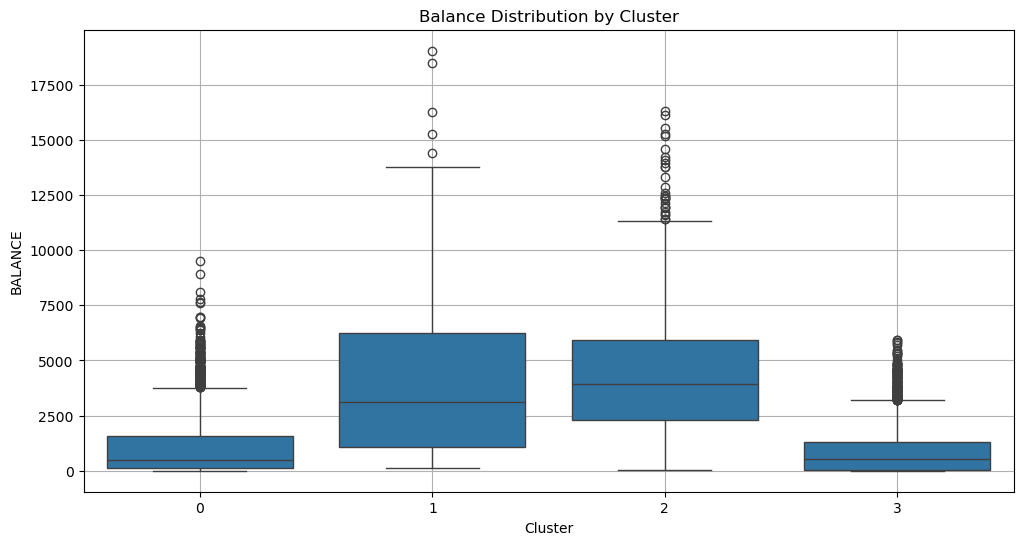

In [87]:
# Visualize key metrics for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='BALANCE', data=df_cluster)
plt.title('Balance Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('BALANCE')
plt.grid()
plt.show()

**Insights**<br><br>
**Cluster 0 (Low-Balance Customers with High Outliers):** <br>

* Majority have very low balances, with the median near zero.
* Large number of outliers, indicating a few customers have very high balances.
* Represents low spenders or infrequent users, with some rare high spenders.
  
**Cluster 1 (Mid-Balance Customers with High Spread):** <br>

* Higher median balance than Cluster 0.
* Wider spread (IQR), meaning balance values vary significantly.
* Contains high-spending outliers, suggesting variable spending behavior.

**Cluster 2 (High-Balance Customers with a Consistent Range):** <br>

* Median balance similar to Cluster 1 but more consistent distribution.
* Fewer extreme outliers, indicating stable spending patterns.
* Likely regular credit card users who maintain high balances.

**Cluster 3 (Very Low Balance Users):** <br>

* Lowest median balance and smallest spread among all clusters.
* Some outliers exist, but at a much lower level than Clusters 1 & 2.
* Likely represents low-usage customers who pay off balances quickly.

#### Business Interpretations
* Clusters 0 & 3 (Low-Balance Users) → Low revenue customers, can be targeted with cashback or incentives to increase spending.
* Clusters 1 & 2 (Mid-to-High Balance Users) → High-value customers, may benefit from premium card offers or loyalty programs.

## Clusters Results from K-Means (PCA)

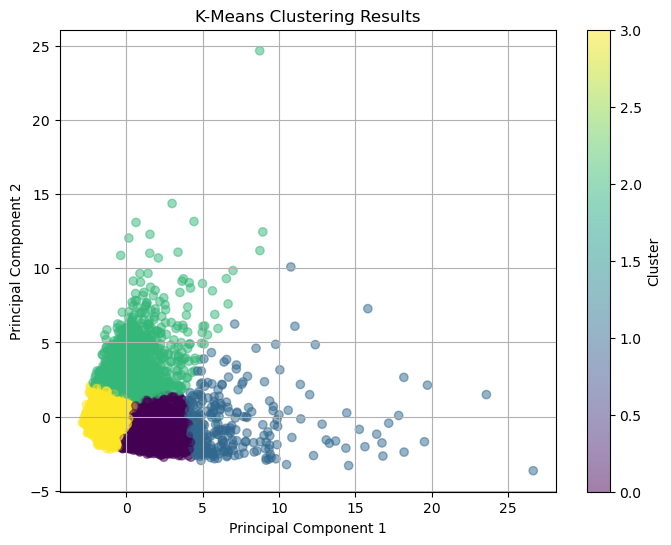

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

## Clusters Results from K-Means (t-SNE)

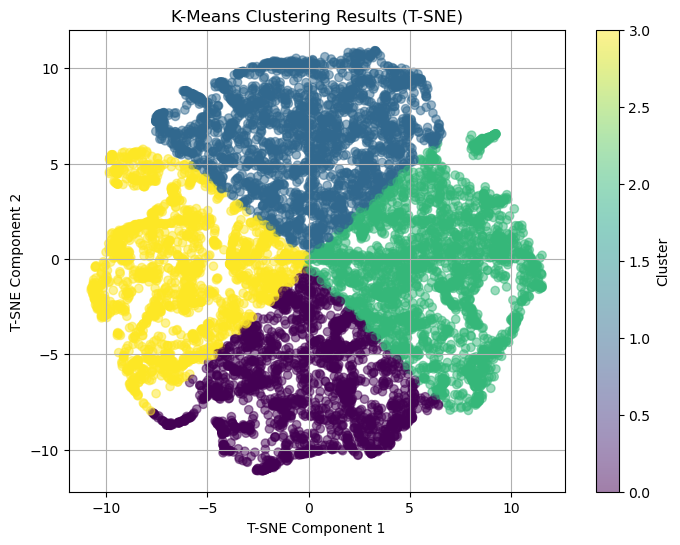

In [94]:
# Fit K-Means model with the best number of clusters
best_n_clusters = 4
kmeans_best_model = KMeans(n_clusters=best_n_clusters, random_state=2022)
kmeans_best_model.fit(X_tsne)
kmeans_labels = kmeans_best_model.predict(X_tsne)

# Visualize K-Means clustering results using T-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne['T-SNE 1'], X_tsne['T-SNE 2'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results (T-SNE)')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

## Conclusion

In this project, we successfully developed and implemented unsupervised learning models to segment credit card customers based on their spending and payment behaviors. The key findings and insights from our analysis can be summarized as follows:

**Effective Customer Segmentation:** <br>
By applying K-Means and Agglomerative Clustering algorithms, we identified distinct customer segments that exhibit unique spending patterns. The K-Means model, with 4 clusters, demonstrated superior performance, achieving a higher silhouette score and lower inertia compared to Agglomerative Clustering.

**Insights from Data Analysis:** <br>
The analysis revealed significant correlations between various features, such as:

* Customers making large one-time purchases contribute significantly to total spending, indicating a target group for premium offers.
* High installment spending correlates with total purchases, suggesting opportunities to promote flexible payment plans.
* Frequent cash advances may indicate liquidity issues, highlighting potential risks for loan defaults.
  
**Visualizations for Clarity:** <br> 
The use of PCA and T-SNE for dimensionality reduction provided clear visualizations of the clustering results. These plots helped in understanding the structure of the data and the effectiveness of the clustering algorithms in identifying distinct customer segments.

**Business Implications:** <br> 
The insights gained from this segmentation analysis can be leveraged to enhance targeted marketing strategies, improve credit risk assessment, and optimize customer relationship management. By understanding the behaviors of different customer segments, financial institutions can tailor their offerings to meet the specific needs of each group, ultimately leading to increased customer satisfaction and retention.

**Future Directions:**<br> 
While the current analysis provides valuable insights, further exploration of additional clustering algorithms (e.g., DBSCAN) and hyperparameter tuning could enhance the robustness of the segmentation. Additionally, integrating customer feedback and transaction history could lead to more dynamic and responsive marketing strategies.

In conclusion, this project demonstrates the power of unsupervised learning in deriving actionable insights from customer data, paving the way for more informed decision-making in credit card usage segmentation. The findings not only contribute to a deeper understanding of customer behaviors but also provide a foundation for strategic initiatives aimed at improving customer engagement and financial performance.